## Regression Tree 回归树 Practise ##



## example one ##
https://github.com/Microstrong0305/WeChat-zhihu-csdnblog-code/tree/master/Decision%20Tree/lihang_5.2

In [80]:
from numpy import *
# 载入数据
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        # python3不适用：fltLine = map(float,curLine) 修改为：
        fltLine = list(map(float, curLine))  # 将每行映射成浮点数，python3返回值改变，所以需要
        dataMat.append(fltLine)
    return dataMat


# Tree结点类型：回归树
def regLeaf(dataSet):  # 生成叶结点，在回归树中是目标变量标签值的均值
    return mean(dataSet[:,-1])
  
# 误差计算函数：回归误差
def regErr(dataSet):  # 计算目标标签值的平方误差（均方误差*总样本数）
    return var(dataSet[:,-1]) * shape(dataSet)[0]

In [21]:
#simplize the notebook using matrix for data
#myDat = mat(loadDataSet('5.2test.txt'))
myDat = matrix([[ 1.  ,  4.5 ],
        [ 2.  ,  4.75],
        [ 3.  ,  4.91],
        [ 4.  ,  5.34],
        [ 5.  ,  5.8 ],
        [ 6.  ,  7.05],
        [ 7.  ,  7.9 ],
        [ 8.  ,  8.23],
        [ 9.  ,  8.7 ],
        [10.  ,  9.  ]])

In [18]:
regErr(myDat)

27.63236

In [44]:
(myDat[:, 0].T.A.tolist())[0]

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [35]:
myDat[nonzero(myDat[:, 1] > 5)[0], :]

matrix([[ 4.  ,  5.34],
        [ 5.  ,  5.8 ],
        [ 6.  ,  7.05],
        [ 7.  ,  7.9 ],
        [ 8.  ,  8.23],
        [ 9.  ,  8.7 ],
        [10.  ,  9.  ]])

#### 算法流程- (最小二乘回归树生成算法)

输入: 训练数据集 $D$;
输出: 回归树 $f(x)$.
在训练数据集所在的输入空间中, 递归地将每个区域划分为两个子区域并决 定每个子区域上的输出值, 构建二叉决策树:

(1) 选择最优切分变量 $j$ 与切分点 $s$, 求解
$$
\min _{j, s}\left[\min _{a_1} \sum_{x_i \in R_1(j, s)}\left(y_i-c_1\right)^2+\min _{c_2} \sum_{x_i \in R_2(j, s)}\left(y_i-c_2\right)^2\right]
$$
   **遍历变量 $j$**, 对固定的切分变量 $j$ 扫描切分点 $s$, 选择使上式达到最小 值的对 $(j, s)$.  
(2) 用选定的对 $(j, s)$ 划分区域并决定相应的输出值:
$$
\begin{gathered}
R_1(j, s)=\left\{x \mid x^{(j)} \leqslant s\right\}, \quad R_2(j, s)=\left\{x \mid x^{(j)}>s\right\} \\
\hat{c}_m=\frac{1}{N_m} \sum_{x_i \in R_m(j, s)} y_i, \quad x \in R_m, m=1,2
\end{gathered}
$$
(3) 继续对两个子区域调用步㗶 (1), (2), 直至满足停止条件.  
(4) 将输入空间划分为 $M$ 个区域 $R_1, R_2, \cdots, R_M$, 生成决策树:
$$
f(x)=\sum_{m=1}^M \hat{c}_m I\left(x \in R_m\right)
$$

## 

In [366]:
(dataset1[:, featIndex].T.A)[0].shape

(300,)

Sum of squared residuals 
$$
S S R=\sum_{j=1}^J \sum_i\left(y_i-\hat{y}_{m j}\right)^2 \cdot b_{m j}\left(x_i\right)
$$


In [367]:
# 切分数据集为两个子集
def binSplitDataSet(dataSet, feature, value):  # 数据集 待切分特征 特征值
    mat0 = dataSet[nonzero(dataSet[:, feature] > value)[0], :]
    mat1 = dataSet[nonzero(dataSet[:, feature] <= value)[0], :]
    # 下面原书代码报错 index 0 is out of bounds,使用上面两行代码
    # mat0 = dataSet[nonzero(dataSet[:, feature] > value)[0], :][0]
    # mat1 = dataSet[nonzero(dataSet[:, feature] <= value)[0], :][0]
    return mat0, mat1

# 二元切分
def chooseBestSplit(dataSet, leafType=regLeaf, errType=regErr, ops=(0, 1)):
    # 切分特征的参数阈值，用户初始设置好
    tolS = ops[0]  # 允许的误差下降值
    tolN = ops[1]  # 切分的最小样本数
    # 若所有特征值都相同，停止切分
    if len(set(dataSet[:, -1].T.tolist()[0])) == 1:  # 倒数第一列转化成list 不重复
        return None, leafType(dataSet)  # 如果剩余特征数为1，停止切分1。
        # 找不到好的切分特征，调用regLeaf直接生成叶结点
    m, n = shape(dataSet)
    S = errType(dataSet)  # 不划分的平均误差(loss)，划分后的loss要好于这个,不然没增益了
    bestS = inf  #init the best sqaure error
    bestIndex = 0
    bestValue = 0
    
    # 遍历数据的每个属性特征
    for featIndex in range(n-1):  
        # for splitVal in set(dataSet[:,featIndex]): python3报错修改为下面
        featureVal = (dataSet[:, featIndex].T.A)[0]
        #for splitVal in set(featureVal):  # 遍历每个特征里不同的特征值
        #    splitVal = featureVal
        
        for i in range(len(featureVal) - 1):
            splitVal = featureVal[i:i+2].mean()  #take the average value of the i and i+1 as split point
            mat0, mat1 = binSplitDataSet(dataSet, featIndex, splitVal)  # 对每个特征进行二元分类
            if (shape(mat0)[0] < tolN) or (shape(mat1)[0] < tolN): continue
            newS = errType(mat0) + errType(mat1)  #根据某个特征值划分计算loss
            if newS < bestS:  # 更新为误差最小的特征
                bestIndex = featIndex
                bestValue = splitVal
                bestS = newS
    # 如果切分后误差效果下降不大，则取消切分，直接创建叶结点
    if (S - bestS) < tolS:
        return None, leafType(dataSet)  # 停止切分2
    mat0, mat1 = binSplitDataSet(dataSet, bestIndex, bestValue)
    # 判断切分后子集大小，小于最小允许样本数停止切分3
    if (shape(mat0)[0] < tolN) or (shape(mat1)[0] < tolN):
        return None, leafType(dataSet)
    return bestIndex, bestValue  # 返回特征编号和用于切分的特征值

class retTreeNode():
    def __init__(self, spInd, spVal, pred):
        self.spVal = spVal
        self.pred = pred
        self.left = None
        self.right = None
        self.spInd = spInd

# 构建tree
def createTree(dataSet, leafType=regLeaf, errType=regErr, ops=(0, 1)):
    # 数据集默认NumPy Mat 其他可选参数【结点类型：回归树，误差计算函数，ops包含树构建所需的其他元组】
    feat, val = chooseBestSplit(dataSet, leafType, errType, ops)
    if feat == None: 
        TreeNode = retTreeNode(None , None , val)        
        return TreeNode  # 满足停止条件时返回叶结点值
    # 切分后赋值
    TreeNode = retTreeNode(feat, val, dataSet[:,-1].mean())
    #retTree['spInd'] = feat  
    #retTree['spVal'] = val
    # 切分后的左右子树
    lSet, rSet = binSplitDataSet(dataSet, feat, val)
    TreeNode.left = createTree(lSet, leafType, errType, ops)
    TreeNode.right = createTree(rSet, leafType, errType, ops)
    return TreeNode

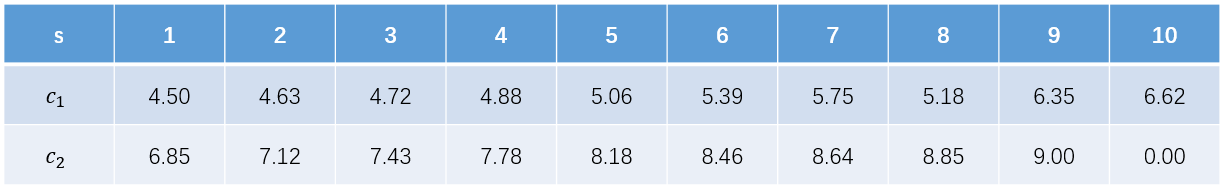

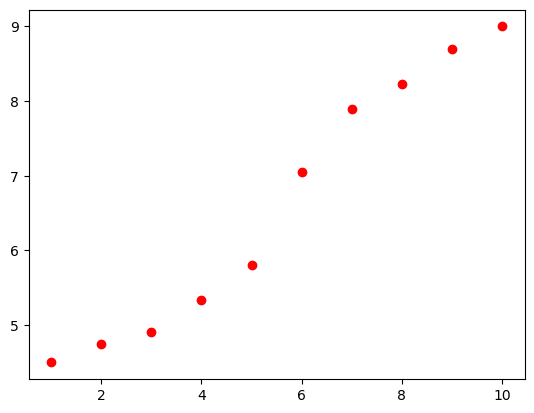

In [368]:
myDat = mat(loadDataSet('5.2test.txt'))
retTree = createTree(dataSet=myDat, ops=(0, 1))
# 绘制数据点图
import matplotlib.pyplot as plt

plt.plot(myDat[:, 0], myDat[:, 1], 'ro')
plt.show()

In [401]:
dataset1 = matrix(df.values)
retTree = createTree(dataset1,ops=(0, 6))

In [402]:
regErr(dataset1)

10139.29592645696

In [403]:
SSR(df.y.to_numpy(), df.y.mean())

10139.29592645696

In [404]:
Node = tree.left.right.right.left.left
print(Node.threshold)
print(Node.pred)

2.9857980865390195
-1.3165119892538402


In [406]:
Node = retTree.right.left.left.right
print(Node.spVal)
print(Node.pred)

None
-1.3898927025120198


In [348]:
def predict_retTree(x):
    curr_node = retTree
    result = None
    while True:
        if not curr_node.spVal:
            break;
        if x > curr_node.spVal:
            if curr_node.left: curr_node = curr_node.left
            else: 
                break
        elif x <= curr_node.spVal:
            if curr_node.right: curr_node = curr_node.right
            else: 
                break
                
    return curr_node.pred

In [407]:
predict_retTree(3)

-1.3898927025120198

** Validation still not so correct ******* unsure where is the problem compare the example2

In [408]:
#validation data
x_val = np.random.uniform(-2, 5, 50)
y_val = np.array( [f(i) for i in x_val] ).squeeze()
y_train= np.ravel(dataset1[:,-1])
x_train = np.ravel(dataset1[:,0])

tr_preds = np.array( [predict_retTree(i) for i in x_train])
val_preds = np.array( [predict_retTree(i) for i in x_val] )

print('Training error: {:.4f}'.format(RSE(y_train, tr_preds)))
print('Validation error: {:.4f}'.format(RSE(y_val, val_preds)))

Training error: 0.0563
Validation error: 5.6288


## example two ##

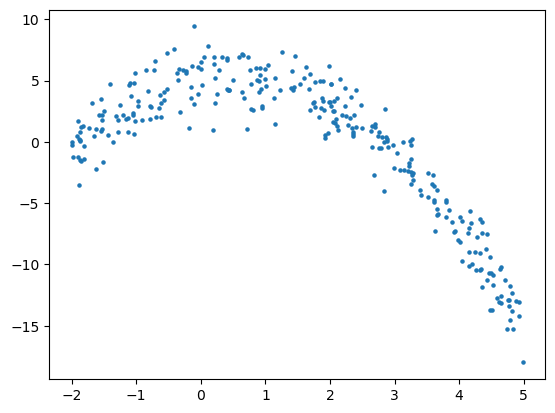

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##generate data and put into database
def f(x):
    mu, sigma = 0, 1.5
    return -x**2 + x + 5 + np.random.normal(mu, sigma, 1)

num_points = 300
np.random.seed(1)
    
x = np.random.uniform(-2, 5, num_points)
y = np.array( [f(i) for i in x] )

plt.scatter(x, y, s = 5)
df = pd.DataFrame(zip(x, y.squeeze()), columns = ['x', 'y'])

In [81]:
#最小二乘回归树生成算法，简洁些，不过多使用点空间
def SSR(r, y): 
    return np.sum( (r - y)**2 )

def find_threshold(df, plot = False):
    SSRs, thresholds = [], []
    for i in range(len(df) - 1):
        threshold = df.x[i:i+2].mean()  #take the average value of the i and i+1 as split point

        low = df[(df.x <= threshold)]
        high = df[(df.x > threshold)]

        guess_low = low.y.mean()
        guess_high = high.y.mean()

        # append the cacluated SSR and the threshold value
        SSRs.append(SSR(low.y.to_numpy(), guess_low) + SSR(high.y.to_numpy(), guess_high)) 
        thresholds.append(threshold)
    
    if plot:
        plt.scatter(thresholds, SSRs, s = 3)
        plt.show()
        
    return thresholds[SSRs.index(min(SSRs))] # returen the min ssr value and threshold

In [167]:
class TreeNode():
    def __init__(self, threshold, pred):
        self.threshold = threshold
        self.pred = pred
        self.left = None
        self.right = None

def create_nodes(tree, df, stop):
    low = df[df.x <= tree.threshold]
    high = df[df.x > tree.threshold]
    
    if len(low) > stop:
        threshold = find_threshold(low) # threshold for next level split
        tree.left = TreeNode(threshold, low.y.mean()) #create the left node which have split point - threshold
        create_nodes(tree.left, low, stop)
        
    if len(high) > stop:
        threshold = find_threshold(high) # threshold for next level split
        tree.right = TreeNode(threshold, high.y.mean()) #create the left node which have split point - threshold
        create_nodes(tree.right, high, stop)
        
threshold = find_threshold(df)
tree = TreeNode(threshold, df.y.mean())
create_nodes(tree, df, 5)

In [171]:
tree.threshold

3.323943098526348

In [200]:
def predict(x,tree):
    curr_node = tree
    result = None
    while True:
        if x <= curr_node.threshold:
            if curr_node.left: curr_node = curr_node.left
            else: 
                break
        elif x > curr_node.threshold:
            if curr_node.right: curr_node = curr_node.right
            else: 
                break
                
    return curr_node.pred

In [202]:
predict(3,tree)

-1.3165119892538402

using Relative squared error to evluate
$$
\begin{gathered}
\mathrm{RSE}=\frac{\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2}{\sum_{i=1}^n\left(y_i-\bar{y}\right)^2} \\
\text { where } \quad \bar{y}=\frac{1}{n} \sum_{i=1}^n y_i
\end{gathered}
$$


In [151]:
def RSE(y, g): 
    return sum(np.square(y - g)) / sum(np.square(y - 1 / len(y)*sum(y)))

#validation data
x_val = np.random.uniform(-2, 5, 50)
y_val = np.array( [f(i) for i in x_val] ).squeeze()

tr_preds = np.array( [predict(i) for i in df.x] )
val_preds = np.array( [predict(i) for i in x_val] )
print('Training error: {:.4f}'.format(RSE(df.y, tr_preds)))
print('Validation error: {:.4f}'.format(RSE(y_val, val_preds)))

Training error: 0.0556
Validation error: 0.0869


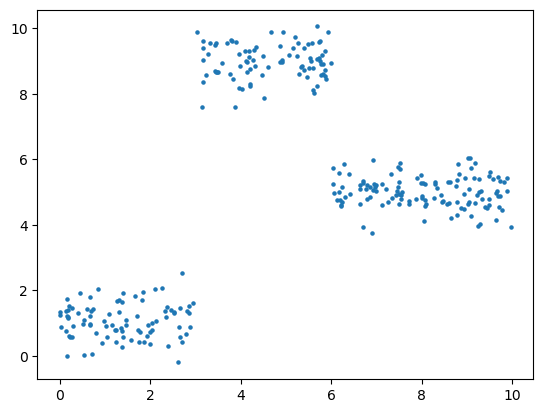

In [205]:
def f2(x):
    mu, sigma = 0, 0.5
    if x < 3: return 1 + np.random.normal(mu, sigma, 1)
    elif x >= 3 and x < 6: return 9 + np.random.normal(mu, sigma, 1)
    elif x >= 6: return 5 + np.random.normal(mu, sigma, 1)
    
np.random.seed(1)
    
x = np.random.uniform(0, 10, num_points)
y = np.array( [f2(i) for i in x] )

plt.scatter(x, y, s = 5)
df2 = pd.DataFrame(zip(x, y.squeeze()), columns = ['x', 'y'])

In [203]:
threshold = find_threshold(df2)
tree2 = TreeNode(threshold, df2.y.mean())
create_nodes(tree2, df2, 5)

In [204]:
predict(3,tree2)

8.008297455717981

In [206]:
#validation data
x_val = np.random.uniform(-2, 5, 50)
y_val = np.array( [f2(i) for i in x_val] ).squeeze()

tr_preds = np.array( [predict(i,tree2) for i in df2.x] )
val_preds = np.array( [predict(i,tree2) for i in x_val] )
print('Training error: {:.4f}'.format(RSE(df2.y, tr_preds)))
print('Validation error: {:.4f}'.format(RSE(y_val, val_preds)))

Training error: 0.0377
Validation error: 0.0241


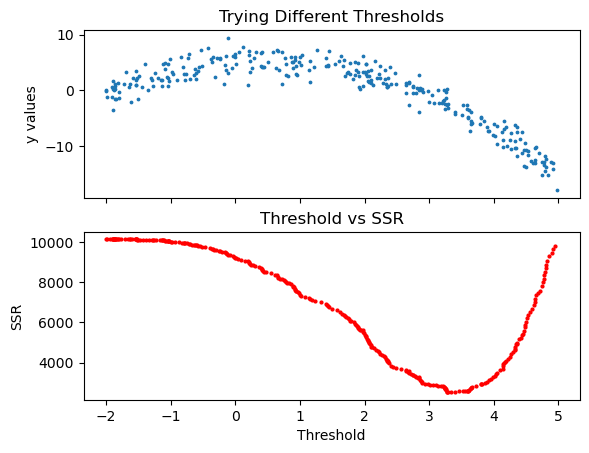

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#===================================================Create Data
def f(x):
    mu, sigma = 0, 1.5
    return -x**2 + x + 5 + np.random.normal(mu, sigma, 1)

np.random.seed(1)
    
x = np.random.uniform(-2, 5, 300)
y = np.array( [f(i) for i in x] )

p = x.argsort()
x = x[p]
y = y[p]


#===================================================Calculate Thresholds
def SSR(r, y): #send numpy array
    return np.sum( (r - y)**2 )

SSRs, thresholds = [], []
for i in range(len(x) - 1):
    threshold = x[i:i+2].mean()
    
    low = np.take(y, np.where(x < threshold))
    high = np.take(y, np.where(x > threshold))
    
    guess_low = low.mean()
    guess_high = high.mean()
    
    SSRs.append(SSR(low, guess_low) + SSR(high, guess_high))
    thresholds.append(threshold)

#===================================================Animated Plot
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True)
x_data, y_data = [], []
x_data2, y_data2 = [], []
ln, = ax1.plot([], [], 'r--')
ln2, = ax2.plot(thresholds, SSRs, 'ro', markersize = 2)
line = [ln, ln2]

def init():
    ax1.scatter(x, y, s = 3)
    ax1.title.set_text('Trying Different Thresholds')
    ax2.title.set_text('Threshold vs SSR')
    ax1.set_ylabel('y values')
    ax2.set_xlabel('Threshold')
    ax2.set_ylabel('SSR')
    return line

def update(frame):
    x_data = [x[frame:frame+2].mean()] * 2
    y_data = [min(y), max(y)]
    line[0].set_data(x_data, y_data)

    x_data2.append(thresholds[frame])
    y_data2.append(SSRs[frame])
    line[1].set_data(x_data2, y_data2)
    return line

ani = FuncAnimation(fig, update, frames = 298,
                    init_func = init, blit = True)
plt.show()
#ani.save('regression_tree_thresholds_120.gif', writer='imagemagick', fps=120)

## example three ##

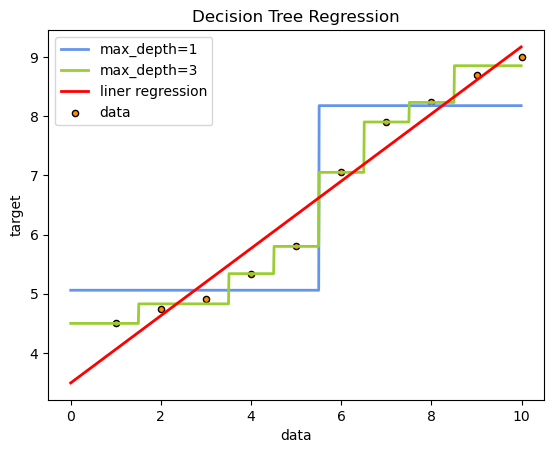

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

# Data set
x = np.array(list(range(1, 11))).reshape(-1, 1)
y = np.array([4.50, 4.75, 4.91, 5.34, 5.80, 7.05, 7.90, 8.23, 8.70, 9.00]).ravel()

# Fit regression model
model1 = DecisionTreeRegressor(max_depth=1)
model2 = DecisionTreeRegressor(max_depth=3)
model3 = linear_model.LinearRegression()
model1.fit(x, y)
model2.fit(x, y)
model3.fit(x, y)

# Predict
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_1 = model1.predict(X_test)
y_2 = model2.predict(X_test)
y_3 = model3.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=1", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=3", linewidth=2)
plt.plot(X_test, y_3, color='red', label='liner regression', linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()